In [26]:
import numpy as np
import matplotlib.pyplot as plt

from main import HeatingModel

In [27]:
# Tutaj jest przykładowy zestaw parametrów dla jednego pomieszczenia z jednym oknem

model_parameters = {
        "areas": {
            "A1": {
                "row_min": 0, "row_max": 100, "col_min": 0, "col_max": 100,
                "init_func": lambda x: 285 + 10 * np.random.random(x.shape),
                "desired_temp": 300
            }
        },
        "walls": {
            "VV1": {
                "row_min": 0, "row_max": 100, "col_min": 0, "col_max": 1
            },
            "VV2": {
                 "row_min": 0, "row_max": 1, "col_min": 0, "col_max": 100
            },
            "VV3": {
                 "row_min": 0, "row_max": 100, "col_min": 99, "col_max": 100
            },
            "VV4": {
                "row_min": 99, "row_max": 100, "col_min": 0, "col_max": 100
            }
        },
        "doors": {
            # Drzwi narazie pomijamy
        },
        "windows": {
            "W1": {
                "row_min": 0, "row_max": 1, "col_min": 40, "col_max": 60
            }
        },
        "radiators": {
            "R1": {
                "row_min": 2, "row_max": 3, "col_min": 40, "col_max": 60, "mask_value": 1
            }
        },
        "domain": {
            "grid": np.meshgrid(np.linspace(-1, 1, 101), np.linspace(-1, 1, 101))[0], "dx": 1
        },
        "force_term": lambda x, t, mask: np.where(
            mask == 1, 1.5, np.where(
                mask == 2, 1.5, np.where(
                    mask == 3, 1.5, np.where(
                        mask == 4, 1.5, 0
                    )
                )
            )
        ),
        "window_temp": lambda t: 270 - 5 * np.sin(24 * t / 3600),
        "diffusion_coefficient": 0.5,
        "current_time": 0.0

    }

In [28]:
# Inicjalizacja modelu

heat_model = HeatingModel(model_parameters)

In [29]:
# Rozpoczęcie N kroków ewolucji w czasie z krokiem ht

N, ht = 10000, .1

heat_model.evolve(n_steps=N, dt=ht, verbose=True)

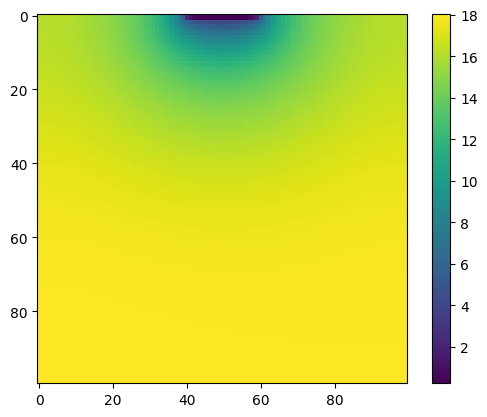

In [33]:
# Wykres po ewolucji

plt.imshow(heat_model.result_matrix - 272)
plt.colorbar()